In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import time

random_state = 2025

# Q1

The dataset is loaded into Python and stored for further reference as "data".

In [9]:
data = pd.read_csv("./loandata.csv")

# Q2

The categorical variables are converted to numerical form so they can be used in conjunction with **Sklearn**. The *Default* column, which indicates whether a student loan applicant has defaulted, is extracted separately from the dataset. This ensures that it is not affected by the transformation of categorical predictors. Then, pd.get_dummies() is applied to the dataset, converting all categorical variables into dummy (binary) variables. This step ensures that each category is represented numerically. The Default variable is reconstructed as a single binary column, where 1 represents default and 0 represents non-default.

In [12]:
target = data['Default']
data = pd.get_dummies(data, drop_first=False).drop(columns=['Default_Yes', 'Default_No'])
data['Default'] = pd.get_dummies(target, drop_first=True)

# Q3

The dataset is split accordingly into a training, validation, and test set.

In [14]:
train_data, temp_data = train_test_split(data, test_size=0.4, shuffle=True, random_state=random_state)
val_data, test_data = train_test_split(temp_data, test_size=0.25, shuffle=True, random_state=random_state)


X_train = train_data.drop(columns='Default')
y_train = train_data['Default']
X_val = val_data.drop(columns='Default')
y_val = val_data['Default']
X_test = test_data.drop(columns='Default')
y_test = test_data['Default']

# Q4

In [16]:
majority_class = y_train.mode()[0]
y_pred_naive = [majority_class] * len(y_val)
acc = accuracy_score(y_val, y_pred_naive)
print("Naive benchmark on Validation Set: {:.3f}".format(acc))

Naive benchmark on Validation Set: 0.784


# Q5

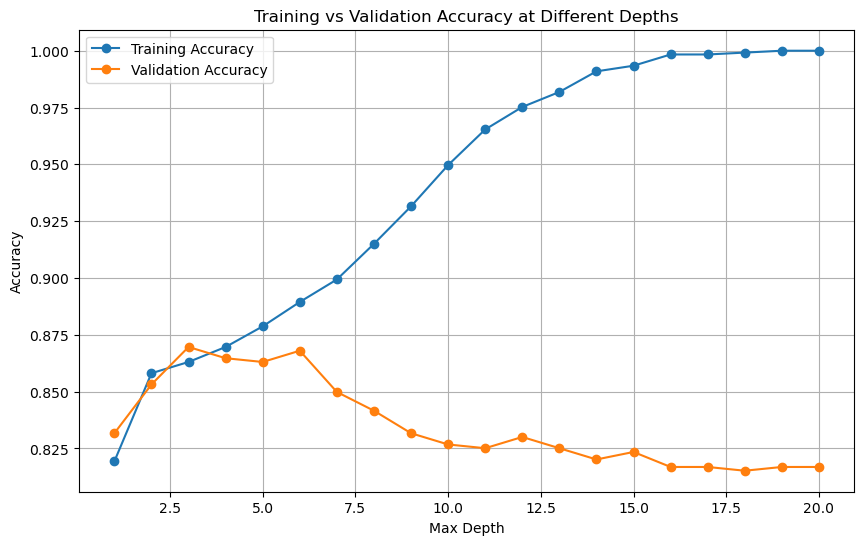

Best Max Depth: 3, Validation Accuracy: 0.870


In [18]:
max_depths = range(1, 21)
train_accs = []
val_accs = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accs, label="Training Accuracy", marker='o')
plt.plot(max_depths, val_accs, label="Validation Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy at Different Depths")
plt.legend()
plt.grid()
plt.show()

best_depth = max_depths[val_accs.index(max(val_accs))]
print("Best Max Depth: {}, Validation Accuracy: {:.3f}".format(best_depth, max(val_accs)))

The Decision Tree Classifier performs well at a moderate depth (max_depth = 3), achieving a validation accuracy of 87.0%. The plot shows that training accuracy approaches 100% as depth increases, indicating overfitting—the model memorizes the training data but fails to generalize to new data. Beyond a depth of 5-6, validation accuracy declines, confirming that overfitting may be a prevailing issue.

The optimal max_depth = 3 is chosen because it maximizes validation accuracy while preventing overfitting. Beyond this depth, validation accuracy declines, indicating that deeper trees memorize noise rather than learning meaningful patterns. This choice balances bias and variance, ensuring good generalization without unnecessary complexity. Additionally, a shallower tree remains interpretable, making it easier to explain the decision-making process.

# Q6

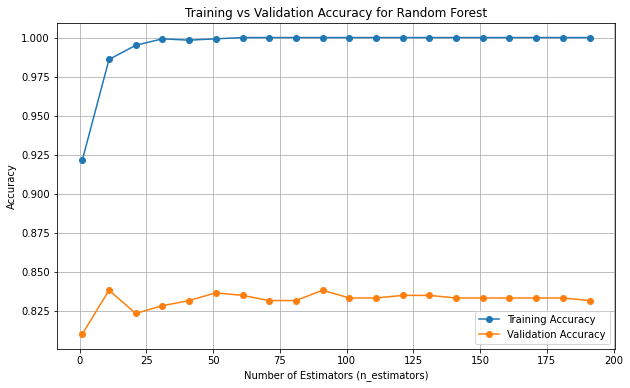

Best Number of Estimators: 11
Training Accuracy with 11 estimators: 1.000
Validation Accuracy with 11 estimators: 0.838


In [7]:
n_estimators_range = range(1, 201, 10)
train_accs = []
val_accs = []
train_times = []

for n in n_estimators_range:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rf.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)

    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accs, label="Training Accuracy", marker='o')
plt.plot(n_estimators_range, val_accs, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Random Forest")
plt.legend()
plt.grid()
plt.show()

best_n = n_estimators_range[val_accs.index(max(val_accs))]
print("Best Number of Estimators: {}".format(best_n))
print("Training Accuracy with {} estimators: {:.3f}".format(best_n, max(train_accs)))
print("Validation Accuracy with {} estimators: {:.3f}".format(best_n, max(val_accs)))

The Random Forest model achieves its best validation accuracy (83.8%) at 11 estimators, beyond which performance plateaus. Unlike the Decision Tree, which overfits at higher depths, Random Forest mitigates this by averaging multiple trees, improving generalization. However, the model still shows signs of overfitting, as training accuracy remains at 100%.

# Q7

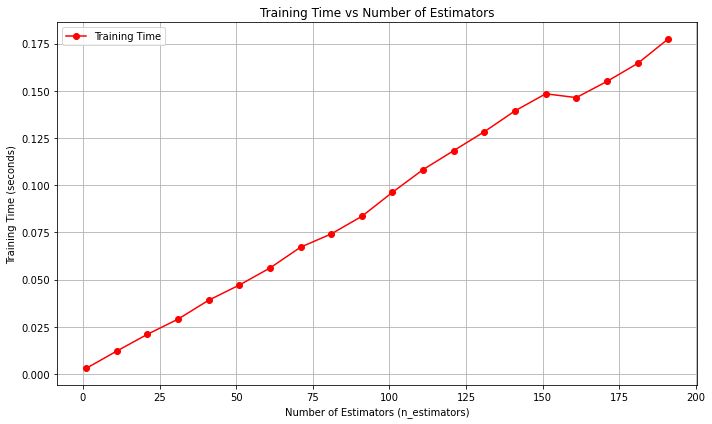

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_times, label="Training Time", marker='o', color='red')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Number of Estimators")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

The justification for choosing 11 estimators is based on the law of diminishing returns. Based on results from Q6, validation accuracy peaks at n_estimators = 11, achieving 83.8 accuracy. Beyond this point, adding extra estimators does not contribute to more accurate predictions. Since the relationship between training time and estimators is linear, the selection of the "best accuracy with fewest estimators" is therefore justified since it provides the best balance of computational efficiency and generalization ability. 

# Q8

In [9]:
best_depth = 3
best_n = 11

start_time = time.time()
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=random_state)
best_tree.fit(X_train, y_train)
train_time_tree = time.time() - start_time
train_acc_tree = accuracy_score(y_train, best_tree.predict(X_train))
val_acc_tree = accuracy_score(y_val, best_tree.predict(X_val))
test_acc_tree = accuracy_score(y_test, best_tree.predict(X_test))

start_time = time.time()
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=random_state)
best_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time
train_acc_rf = accuracy_score(y_train, best_rf.predict(X_train))
val_acc_rf = accuracy_score(y_val, best_rf.predict(X_val))
test_acc_rf = accuracy_score(y_test, best_rf.predict(X_test))

df_comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Training Time (s)": [train_time_tree, train_time_rf],
    "Training Accuracy": [train_acc_tree, train_acc_rf],
    "Validation Accuracy": [val_acc_tree, val_acc_rf],
    "Test Accuracy": [test_acc_tree, test_acc_rf]
})

df_comparison

,Model,Training Time (s),Training Accuracy,Validation Accuracy,Test Accuracy
0,Decision Tree,0.003009,0.863036,0.869637,0.881188
1,Random Forest,0.011426,0.985974,0.838284,0.866337


The decision tree achieves a validation accuracy of 86.96, while the Random Forest model with 11 estimators has a validation accuracy of 83.8%. This suggests that a single optimized decision tree outperformed the random forest on this particular dataset. This could be because of the smaller size of the dataset, which does not require multiple trees to capture key decision patterns.  This is substantiated by the fact that Random Forest showed diminishing returns in validation accuracy beyond 11 estimators, meaning that additional trees did not significantly improve performance, explaining why the singular decision tree was sufficient for better generalization. 

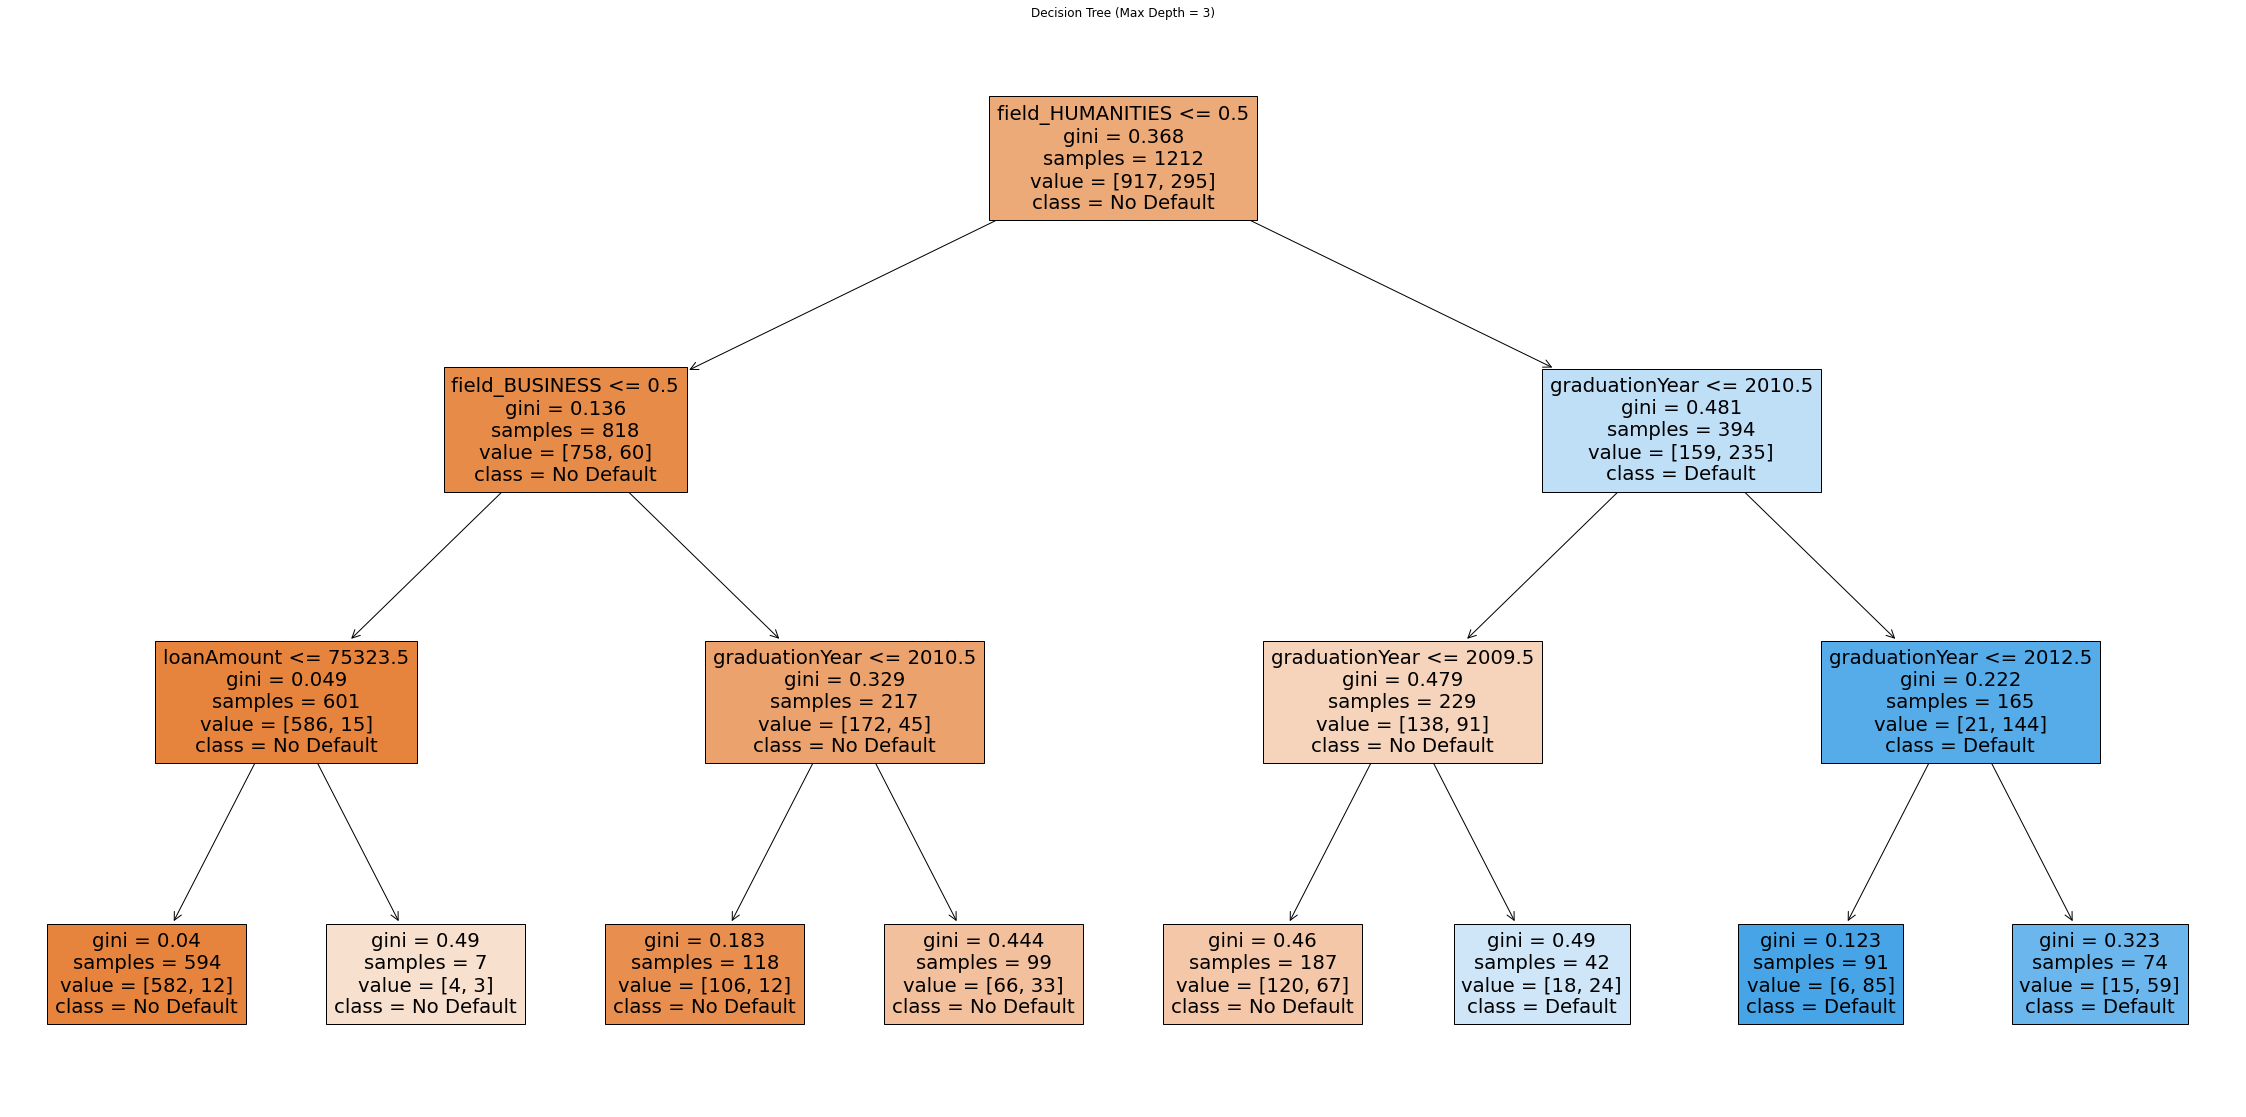

In [10]:
plt.figure(figsize=(40, 20))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=["No Default", "Default"], max_depth=best_depth)
plt.title("Decision Tree (Max Depth = {})".format(best_depth))
plt.show()

The Decision Tree visualization illustrates why a single Decision Tree is more interpretable than a Random Forest. Each node represents a decision rule based on key factors such as field of study, graduation year, and loan amount, providing an intuitive flowchart for predicting student loan defaults. For example, the root node splits based on whether the applicant studied Humanities, and further splits reveal how Business fields, graduation year, and loan amount influence default likelihood. The inclusion of Gini impurity values at each node also helps explain how well each decision separates defaulters from non-defaulters.

In contrast, a Random Forest aggregates multiple decision trees, making it difficult to extract a clear decision path. While this improves accuracy and generalization, it sacrifices interpretability by making the decision-making process an effective black box, making it harder to explain why a particular prediction was made. In a lending context, financial institutions might prefer the transparency of a Decision Tree, where loan officers can follow a direct sequence of rules since customer interest and convenience are important considerations.

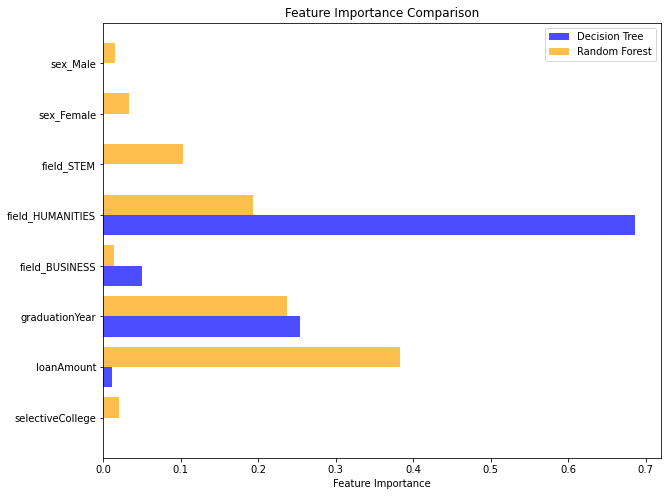

In [11]:
tree_importances = best_tree.feature_importances_
rf_importances = best_rf.feature_importances_

features = X_train.columns
y = np.arange(len(features))
width = 0.4

plt.figure(figsize=(10, 8))
plt.barh(y - width/2, tree_importances, height=width, label="Decision Tree", alpha=0.7, color='blue')
plt.barh(y + width/2, rf_importances, height=width, label="Random Forest", alpha=0.7, color='orange')

plt.yticks(ticks=y, labels=features)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()

This chart highlights a key difference between Decision Trees and Random Forests. While Random Forests usually generalize better, in this case, the Decision Tree’s focused decision-making resulted in superior validation performance. The Decision Tree prioritized the most relevant feature, leading to better generalization for this dataset, whereas the Random Forest diluted its decision-making across multiple factors, slightly reducing its effectiveness. This suggests that simpler models can sometimes outperform more complex models, depending on the dataset.

This comparison highlights that simpler models can sometimes generalize better than more complex ensembles. Despite the expectation that Random Forests improve generalization, the Decision Tree (max_depth = 3) achieved higher validation accuracy (87.0%) than the Random Forest (83.8%), suggesting that a single optimized tree captured key decision patterns more effectively. From an interpretability standpoint, the Decision Tree offers clear, explainable decision rules, making it preferable for applications requiring transparency. In contrast, the Random Forest distributes feature importance across multiple trees, making it harder to trace individual predictions. Regarding training time, the Decision Tree is computationally efficient, while the Random Forest scales linearly in complexity without notable accuracy improvements beyond 11 estimators.

Ultimately, while Random Forests are generally more robust, this case demonstrates that a well-tuned Decision Tree can outperform ensemble models when the dataset has clear decision patterns. The takeaway is that model complexity should always be justified by meaningful performance gains rather than assumed superiority.